In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import imghdr
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import time as t
import urllib.request


In [2]:
data_dir = 'data'
os.listdir(data_dir)

['Boar', 'Elephants', 'Parrots', 'Peacock']

In [3]:
os.listdir(os.path.join(data_dir,'Boar'))

['02germany-boar-fpwn-videoSixteenByNine3000.jpg',
 '0x0.jpg',
 '1-1920x1080-7d185ef0ea25e1a373c7ac046ad747b3(1).png',
 '1-1920x1080-7d185ef0ea25e1a373c7ac046ad747b3.png',
 '1216450027-1(1).jpg',
 '1216450027-1.jpg',
 '1280px-Sus_scrofa_-_Pulau_Ubin-3iv9a8t3d37e9vy9zmnls0(1).jpg',
 '1280px-Sus_scrofa_-_Pulau_Ubin-3iv9a8t3d37e9vy9zmnls0.jpg',
 '14096954_112323-ap-super-pig-invasion-img.jpg',
 '1440x810_cmsv2_3016fdd4-5a34-5e69-9a3b-5dfa83d050b4-7824024.jpg',
 '14_3-col_Boars-05_oldy.jpg',
 '1a096c76-c31b-47ce-b5fa-cbda96b102df_Wateringhole.jpg',
 '20171011-_T4A7836-scaled(1).jpg',
 '20171011-_T4A7836-scaled.jpg',
 '20230209-killian-053A7468-277.jpg',
 '2203-cinghiale-boar-900x900-1(1).jpg',
 '2203-cinghiale-boar-900x900-1.jpg',
 '230721-wild-boar-germany-mb-1303-15e620.jpg',
 '278558136_10227949551795063_192381031855209311_n.jpg',
 '2fb3b7fe7aeb452ea39a1425b188dba3.jpeg',
 '2Fmethode2Ftimes2Fprod2Fweb2Fbin2F60a92b94-05f5-11ee-b1f9-dbcd37af20fb.jpg',
 '360_F_201114366_ewVmKvLAoOuJ7c2nAq8

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

Boar
02germany-boar-fpwn-videoSixteenByNine3000.jpg
0x0.jpg
1-1920x1080-7d185ef0ea25e1a373c7ac046ad747b3(1).png
1-1920x1080-7d185ef0ea25e1a373c7ac046ad747b3.png
1216450027-1(1).jpg
1216450027-1.jpg
1280px-Sus_scrofa_-_Pulau_Ubin-3iv9a8t3d37e9vy9zmnls0(1).jpg
1280px-Sus_scrofa_-_Pulau_Ubin-3iv9a8t3d37e9vy9zmnls0.jpg
14096954_112323-ap-super-pig-invasion-img.jpg
1440x810_cmsv2_3016fdd4-5a34-5e69-9a3b-5dfa83d050b4-7824024.jpg
14_3-col_Boars-05_oldy.jpg
1a096c76-c31b-47ce-b5fa-cbda96b102df_Wateringhole.jpg
20171011-_T4A7836-scaled(1).jpg
20171011-_T4A7836-scaled.jpg
20230209-killian-053A7468-277.jpg
2203-cinghiale-boar-900x900-1(1).jpg
2203-cinghiale-boar-900x900-1.jpg
230721-wild-boar-germany-mb-1303-15e620.jpg
278558136_10227949551795063_192381031855209311_n.jpg
2fb3b7fe7aeb452ea39a1425b188dba3.jpeg
2Fmethode2Ftimes2Fprod2Fweb2Fbin2F60a92b94-05f5-11ee-b1f9-dbcd37af20fb.jpg
360_F_201114366_ewVmKvLAoOuJ7c2nAq8aeLyse9WmnUsI.jpg
478086eb-d213-40ce-97b9-8c16896cf745.jpg
5f681de1-0001-0004-000

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2709 files belonging to 4 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
print(data)

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
batch = data_iterator.next()

In [9]:
batch[0].shape

(32, 256, 256, 3)

In [10]:
batch = data_iterator.next()
batch[1]

array([0, 1, 3, 3, 2, 3, 0, 2, 2, 0, 1, 0, 0, 3, 0, 1, 3, 0, 3, 2, 0, 0,
       1, 3, 1, 3, 0, 0, 1, 1, 3, 1])

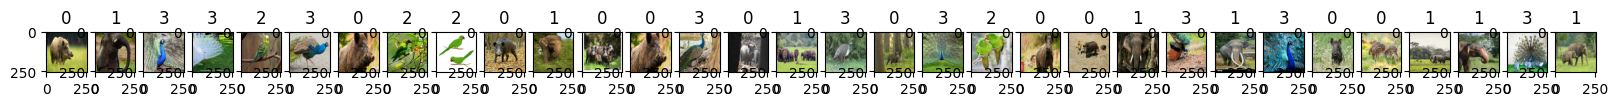

In [11]:
fig, ax = plt.subplots(ncols=32, figsize=(20,20))
for idx, img in enumerate(batch[0][:32]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[8.54090080e-02, 8.54090080e-02, 8.36626813e-02],
          [1.63396135e-01, 1.62086397e-01, 1.06732540e-01],
          [2.10424319e-01, 1.96476713e-01, 5.96277565e-02],
          ...,
          [7.55208358e-02, 7.94424042e-02, 5.98345585e-02],
          [7.84313753e-02, 8.23529437e-02, 5.92601113e-02],
          [7.84313753e-02, 8.23529437e-02, 5.88235296e-02]],
 
         [[7.83433467e-02, 7.83433467e-02, 7.67635852e-02],
          [1.49435773e-01, 1.48126021e-01, 9.67608467e-02],
          [2.06676722e-01, 1.92729115e-01, 5.58801554e-02],
          ...,
          [7.57750571e-02, 7.96966255e-02, 5.82610033e-02],
          [7.61871934e-02, 8.01087618e-02, 5.67660928e-02],
          [7.61871934e-02, 8.01087618e-02, 5.65793514e-02]],
 
         [[7.05178827e-02, 7.05178827e-02, 6.90626130e-02],
          [1.29996076e-01, 1.28686324e-01, 8.03024471e-02],
          [2.00741947e-01, 1.86794341e-01, 5.03632054e-02],
          ...,
          [5.99581115e-02, 6.40885904e-02, 4.4037

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size

59

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [96]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.fit(trainign_images,training_labels,epochs=20,validation_data=(testing_images,testing_labels))

In [18]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [20]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
59/59 [==============================] - 23s 234ms/step - loss: 1.4040 - accuracy: 0.4767 - val_loss: 0.9546 - val_accuracy: 0.6066
Epoch 2/20
59/59 [==============================] - 16s 250ms/step - loss: 0.7884 - accuracy: 0.7007 - val_loss: 0.6256 - val_accuracy: 0.7776
Epoch 3/20
59/59 [==============================] - 16s 250ms/step - loss: 0.6047 - accuracy: 0.7680 - val_loss: 0.6551 - val_accuracy: 0.7500
Epoch 4/20
59/59 [==============================] - 15s 234ms/step - loss: 0.4144 - accuracy: 0.8517 - val_loss: 0.6296 - val_accuracy: 0.7904
Epoch 5/20
59/59 [==============================] - 15s 233ms/step - loss: 0.2342 - accuracy: 0.9174 - val_loss: 0.5208 - val_accuracy: 0.8419
Epoch 6/20
59/59 [==============================] - 15s 233ms/step - loss: 0.1249 - accuracy: 0.9635 - val_loss: 0.7305 - val_accuracy: 0.8309
Epoch 7/20
59/59 [==============================] - 15s 235ms/step - loss: 0.0715 - accuracy: 0.9820 - val_loss: 0.8692 - val_accuracy: 0.8217

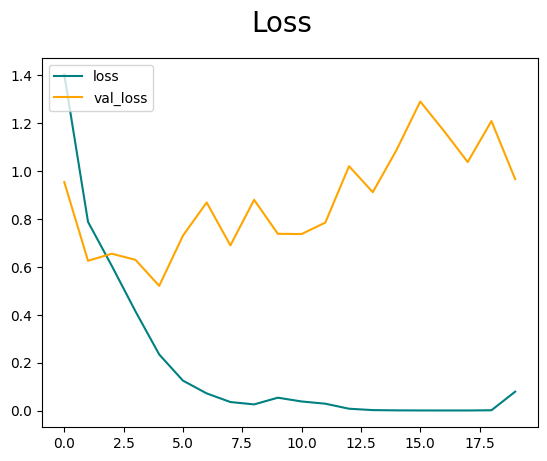

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

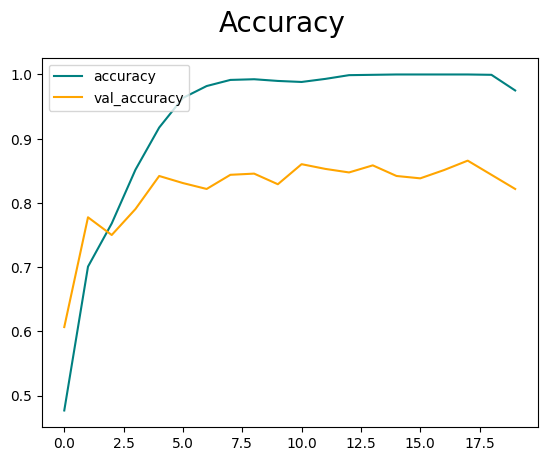

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
# loss, accuracy = model.evaluate(testing_images,testing_labels)
# print(f"Loss: {loss}")
# print(f"Accuracy: {accuracy}")

model.save('image_classifire.model')

INFO:tensorflow:Assets written to: image_classifire.model\assets


INFO:tensorflow:Assets written to: image_classifire.model\assets


In [2]:

model = models.load_model('image_classifire.model')

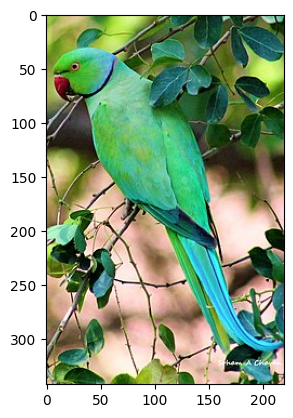

1/1 [==============================] - 8s 8s/step
Peacock


In [3]:
animal = ["Boar","Elephant","Parrot","Peacock"]

img = cv.imread('parrot.jpg')
# img = cv.imread('http://192.168.152.159/capture')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()
resize = cv.resize(img,(256,256),interpolation=cv.INTER_CUBIC)
# plt.imshow(resize)
# plt.show()
prediction = model.predict(np.array([resize])/255)
# print(prediction)
index = np.argmax(prediction)
print(animal[index])

In [ ]:
import urllib.request
imageResponse = urllib.request.urlopen("http://192.168.152.159/capture?")
imgNp = np.array(bytearray(imageResponse.read()),dtype=np.uint8)
frame = cv.imdecode(imgNp,-1)



In [5]:
# capture = cv.VideoCapture("http://192.168.152.159:81/stream") # VideoCapture(0) the argument will determin the input sourse for example 0 means the webcam and if there is other cameras then need to give that number
while True:
    # capture = cv.VideoCapture("http://192.168.152.159:81/stream")
    imageResponse = urllib.request.urlopen("http://192.168.152.159/capture?")
    imgNp = np.array(bytearray(imageResponse.read()),dtype=np.uint8)
    frame = cv.imdecode(imgNp,-1)
    # isTrue,frame = capture.read()
    cv.imshow('Video',frame)
    img = cv.cvtColor(frame,cv.COLOR_BGR2RGB)

    # plt.imshow(img)
    # plt.show()
    resize = cv.resize(img,(256,256),interpolation=cv.INTER_CUBIC)
    # plt.imshow(resize)
    # plt.show()
    prediction = model.predict(np.array([resize])/255)
    # print(prediction)
    index = np.argmax(prediction)
    print(animal[index])
    if cv.waitKey(5000) & 0xFF==ord('d'):
        break
    # t.sleep(3)

# capture.release()
cv.destroyAllWindows()

1/1 [==============================] - 0s 28ms/step
Elephant
1/1 [==============================] - 0s 26ms/step
Elephant
1/1 [==============================] - 0s 26ms/step
Elephant
1/1 [==============================] - 0s 28ms/step
Elephant
1/1 [==============================] - 0s 26ms/step
Elephant
1/1 [==============================] - 0s 26ms/step
Boar
1/1 [==============================] - 0s 28ms/step
Boar
1/1 [==============================] - 0s 26ms/step
Boar
1/1 [==============================] - 0s 26ms/step
Boar
1/1 [==============================] - 0s 26ms/step
Elephant
1/1 [==============================] - 0s 26ms/step
Elephant
1/1 [==============================] - 0s 26ms/step
Elephant
1/1 [==============================] - 0s 26ms/step
Elephant
1/1 [==============================] - 0s 25ms/step
Elephant
1/1 [==============================] - 0s 25ms/step
Elephant
1/1 [==============================] - 0s 25ms/step
Boar
1/1 [==============================] - 0s 26

In [27]:
count = 0
for image_class in os.listdir(data_dir):
    count = 0 
    # print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # print(image)
        # print(f'{image_class}/{image}')
        count += 1
        if count >10:
            print('......................................')
            break
        img = cv.imread(f'data/{image_class}/{image}')
        img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        resize = cv.resize(img,(256,256),interpolation=cv.INTER_CUBIC)
        prediction = model.predict(np.array([resize])/255)
        index = np.argmax(prediction)
        
        
        print(index)

1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 17ms/step
0
......................................
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 18ms/step
1
1/1 [==============================] - 0s 17ms/step
1
1/1 [==============================] - 0s 18ms/step
1
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 18ms/step
1
1/1 [==============================] - 0s 18ms/step
1
1/1 [==============================] - 0s 1